<a href="https://colab.research.google.com/github/marcelegv/ML_Analytics/blob/main/MVP2_Dataset_Sale_ML_e_Analytics_VersaoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MVP Machine Learning e Analytics

**Nome:** Marcele Garcez Veiga

**Matrícula:** 4052025000206

**Dataset:** [Estatísticas de Vendas 2023](https://www.kaggle.com/datasets/sahilislam007/sales-dataset/data)



# 1. Escopo, Objetivo e Definição do Problema

## Objetivo

O objetivo deste projeto é desenvolver e avaliar um **modelo de Machine Learning de regressão para prever as vendas mensais** de uma empresa de varejo e tecnologia.

O modelo, treinado com dados de transações de 2023, servirá como um protótipo para auxiliar a gestão da empresa no planejamento estratégico, otimizando a alocação de recursos, melhorando o fluxo de caixa e embasando a tomada de decisões.

## Descrição do Problema

O problema consiste em utilizar um conjunto de dados multivariado, que registra as compras de clientes ao longo do ano de 2023, para estimar a quantidade total de vendas em cada mês. O dataset contém informações cruciais sobre o cliente (idade, gênero) e a transação (data, categoria do produto, quantidade, preço por unidade e quantidade total gasta).

O dataset escolhido foi selecionado da plataforma Kaggle, que consiste em uma plataforma online que oferece ferramentas e recursos para aprender, compartilhar, competir e colaborar na área da ciência de dados.
Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Área de Aplicação

A área de aplicação do problema é a de **dados tabulares**. O conjunto de dados se enquadra nessa categoria por ser organizado em uma estrutura de linhas e colunas, similar a uma planilha. Nesse formato, cada linha representa uma transação de venda única, e cada coluna corresponde a um atributo específico, como a data, o gênero do cliente ou a quantidade total gasta.

Portanto, o problema de previsão de vendas é resolvido a partir de um formato de dados bem definido, organizado e relacional, que é a base para a maioria das análises de negócios.

## Valor para o negócio/usuário

O projeto apresentado transforma a maneira como a empresa de varejo gerencia suas operações e toma decisões. Em vez de depender de intuição ou métodos tradicionais de previsão, a empresa ganha uma ferramenta analítica baseada em dados que oferece uma visão mais precisa do futuro.

Desta forma, agrega valor à medida que melhora o Planejamento Estratégico, otimiza a gestão de recursos, melhoria no fluxo de caixa e fortalece a cultura data-driven na empresa.

Assim, este projeto transforma um problema complexo e incerto em uma oportunidade para obter uma vantagem competitiva, usando a análise preditiva para orientar as ações da empresa e garantir um crescimento mais sustentável e inteligente.

## Premissas e Hipóteses

As variáveis fornecidas no dataset são suficientes para capturar as dinâmicas de vendas mensais uma vez que cobrem os principais aspectos que influenciam o comportamento de vendas em um cenário de varejo.

O dataset está livre de erros significativos e valores duplicados que possam comprometer a análise, e **os valores faltantes existentes serão tratados no decorrer da análise e não invalidarão o modelo**.

A amostra de dados é representativa o suficiente para generalizar os padrões de compra observados para outras transações. Logo, os padrões observados se aplicam a outras transações não incluídas na amostra.

O comportamento de compra e as tendências de vendas observados em 2023 se manterão relevantes no futuro próximo, permitindo que o modelo treinado com dados de 2023 seja utilizado para fazer previsões futuras, o que garante uma consistência temporal sobre os dados utilizados.

## Atributos do Dataset

O dataset Sales contém 1000 amostras, com sete atributos, distribuídos da seguinte forma:

- ***Data*** (data da transação)
- ***Gênero*** (gênero do cliente: masculino ou feminino)
- ***Idade*** (idade do cliente no momento da compra)
- ***Categoria do Produto*** (categoria do item comprado)
- ***Quantidade*** (número de unidades compradas na transação)
- ***Preço por unidade*** (custo de um item na categoria selecionada)
- ***Quantidade total*** (Valor total gasto (Quantidade x Preço por Unidade))

# 2. Reprodutibilidade e ambiente

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização.

Nela também será definida uma seed para reprodutibilidade, garantindo que o resultado seja o mesmo a cada execução.

### 2.1 Dependências

Instalação de pacotes extras através do gerenciador de pacotes do Python.

In [2]:
!pip install xgboost
!pip install lightgbm

### 2.2 Importações de Bibliotecas Utilizadas

In [3]:
# Manipulação e Análise de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento do tempo de execução dos modelos utilizados
import time

# Aprendizado de Máquina
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor # Importação do modelo DummyRegressor para a etapa 6. Baseline
import xgboost as xgb
import lightgbm as lgb

# Computação Científica e Técnica
from scipy.stats import randint

# Impedindo a exibição de warnings
import warnings
warnings.filterwarnings("ignore")

# Fixando a seed para reprodutibilidade
# O trecho assegura que, independentemente de quando ou onde o notebook for executado, os resultados serão sempre os mesmos.
SEED = 42
np.random.seed(SEED)


### 2.3 Criação das funções Python

Esta seção consolida todas as funções necessárias para a análise, visualização e pré-processamento dos dados, bem como os parâmetros para sua utilização.

In [4]:
def define_titulo_eixos(t,x,y):
    # Adiciona títulos e rótulos aos gráficos que serão criados
    # Parâmetros: Título do Gráfico, Rótulo do eixo X e Rótulo do eixo Y
    plt.title(t, fontsize=16)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)

def finalizar_e_salvar_grafico(nome_arquivo):
    #Ajusta o layout do gráfico, salva em um arquivo e o exibe.
    #Argumentos: nome_arquivo (str): O nome do arquivo para salvar o gráfico.

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.savefig(nome_arquivo) # Salva o gráfico com o nome especificado
    plt.show() # Exibe o gráfico

### 2.4 Criando um transformador customizado para datas

In [5]:
# Herda de BaseEstimator e TransformerMixin para ser compatível com o scikit-learn
class DateFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, date_col):
        self.date_col = date_col

    # O método fit() não faz nada aqui, mas é necessário para a compatibilidade do pipeline
    def fit(self, X, y=None):
        return self

    # O método transform() extrai as features da coluna de data
    def transform(self, X):
        X_copy = X.copy()

        # Converte a coluna de data para o tipo datetime
        X_copy[self.date_col] = pd.to_datetime(X_copy[self.date_col])

        # Extrai features de tempo
        X_copy['Month'] = X_copy[self.date_col].dt.month
        X_copy['DayOfWeek'] = X_copy[self.date_col].dt.dayofweek
        X_copy['DayOfMonth'] = X_copy[self.date_col].dt.day
        X_copy['IsWeekend'] = X_copy[self.date_col].dt.weekday.isin([5, 6]).astype(int)

        # Remove a coluna de data original
        X_copy = X_copy.drop(columns=[self.date_col])
        return X_copy


# 3. Dados: carga, entendimento e qualidade



## 3.1 Carga de Dados

Nesta seção, realizaremos o carregamento inicial do dataset Sales a partir da leitura de um arquivo no formato CSV e exibiremos uma mensagem de acordo com o status do carregamento, bem como as primeiras linhas em caso de sucesso.

In [6]:
try:
  vd = pd.read_csv('https://raw.githubusercontent.com/marcelegv/AnaliseExploratoria/refs/heads/main/Sales_Dataset.csv')
  print("Dataset Vendas carregado com sucesso!")

  if not vd.empty: # Verifica se o DataFrame não está vazio
    print("\n--- Exibindo as primeiras 5 linhas do Dataset Vendas ---")
    # Renomeando a primeira coluna, sem alterar o arquivo original
    vd = vd.rename(columns={vd.columns[0]: 'Sale Number'})

    # Converte a coluna 'Data' para o tipo datetime
    vd['Date'] = pd.to_datetime(vd['Date'])

    # Criando uma cópia do DataFrame original recém-carregado
    vd_original = vd.copy()

    # Ordenando por data
    vd = vd.sort_values(by='Date', ascending=True)

    display(vd.head())
  else:
    print("\n--- Não há informações sobre vendas disponíveis! ---")
except FileNotFoundError:
    print("Erro: O arquivo 'Sales_Dataset.csv' não foi encontrado. Verifique o nome e o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Dataset Vendas carregado com sucesso!

--- Exibindo as primeiras 5 linhas do Dataset Vendas ---


,Sale Number,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,521,2023-01-01,Male,NaN,Beauty,3,500,1500
179,179,2023-01-01,Male,41.0,Clothing,3,300,900
558,558,2023-01-01,Female,40.0,Clothing,4,300,1200
302,302,2023-01-02,NaN,19.0,Electronics,3,30,90
978,978,2023-01-02,Female,19.0,Beauty,1,25,25


## 3.2 Verificações Iniciais

Nesta seção, vamos analisar o formato do conjunto de dados, os tipos de atributos e valores ausentes no dataFrame.

In [7]:
# Verificações iniciais
print("O formato do DataFrame vd (linhas, colunas) é:", vd.shape)

# Tipo de dados por coluna
print("\nTipos de dados por coluna:")

print(vd.info())

# Verificando valores ausentes
print("--- Verificando valores ausentes ---")
# Verificando se há dados faltando nas colunas específicas
colunas_para_verificar = ['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

print("Contagem de valores ausentes por coluna:")
display(vd[colunas_para_verificar].isnull().sum())

O formato do DataFrame vd (linhas, colunas) é: (1000, 8)

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale Number       1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Gender            984 non-null    object        
 3   Age               982 non-null    float64       
 4   Product Category  1000 non-null   object        
 5   Quantity          1000 non-null   int64         
 6   Price per Unit    1000 non-null   int64         
 7   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 70.3+ KB
None
--- Verificando valores ausentes ---
Contagem de valores ausentes por coluna:


,0
Date,0
Gender,16
Age,18
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


O dataset Sales possui 1000 instâncias. Há quatro características de medição que são de tipo numérico e 3 atributos categóricos, sendo eles Data ("Date"), Gênero("Gender") e Categoria de Produtos("Product Category").

O dataset Sales possui valores nulos para uma variável quantitativa (Age) e uma variável categórica (Gender), como demonstrado. Nas próximas etapas, o tratamento de valores nulos será realizado com imputação (preenchimento com a mediana e com 'Não informado').

## 3.3 Definição de variáveis

Esta etapa define todas as variáveis que serão utilizadas durante as Análises, Pré-processamento e Visualização dos dados.

In [8]:
# Definição de Variáveis de Imputação
empty_genero = 'Não informado'

# Dicionário para armazenar os resultados de todos os modelos
results = {}

## 3.4 Análise exploratória resumida (EDA)

### 3.4.1 Resumo Estatístico das Variáveis Numéricas
  
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [9]:
# estatísticas descritivas básicas do dataset
vd.describe()


,Sale Number,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,982.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2023-07-03 00:25:55.200000256,41.427699,2.514000,179.890000,456.000000
min,0.000000,2023-01-01 00:00:00,18.000000,1.000000,25.000000,25.000000
25%,249.750000,2023-04-08 00:00:00,30.000000,1.000000,30.000000,60.000000
50%,499.500000,2023-06-29 12:00:00,42.000000,3.000000,50.000000,135.000000
75%,749.250000,2023-10-04 00:00:00,53.000000,4.000000,300.000000,900.000000
max,999.000000,2024-01-01 00:00:00,64.000000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.698157,1.132734,189.681356,559.997632


### 3.4.2 Distribuição das Variáveis (Histogramas)
    
Permite analisar a frequência de valores em diferentes intervalos para as variáveis idade e quantidade total gasta, permitindo entender como ocorre a distribuição dos dados.

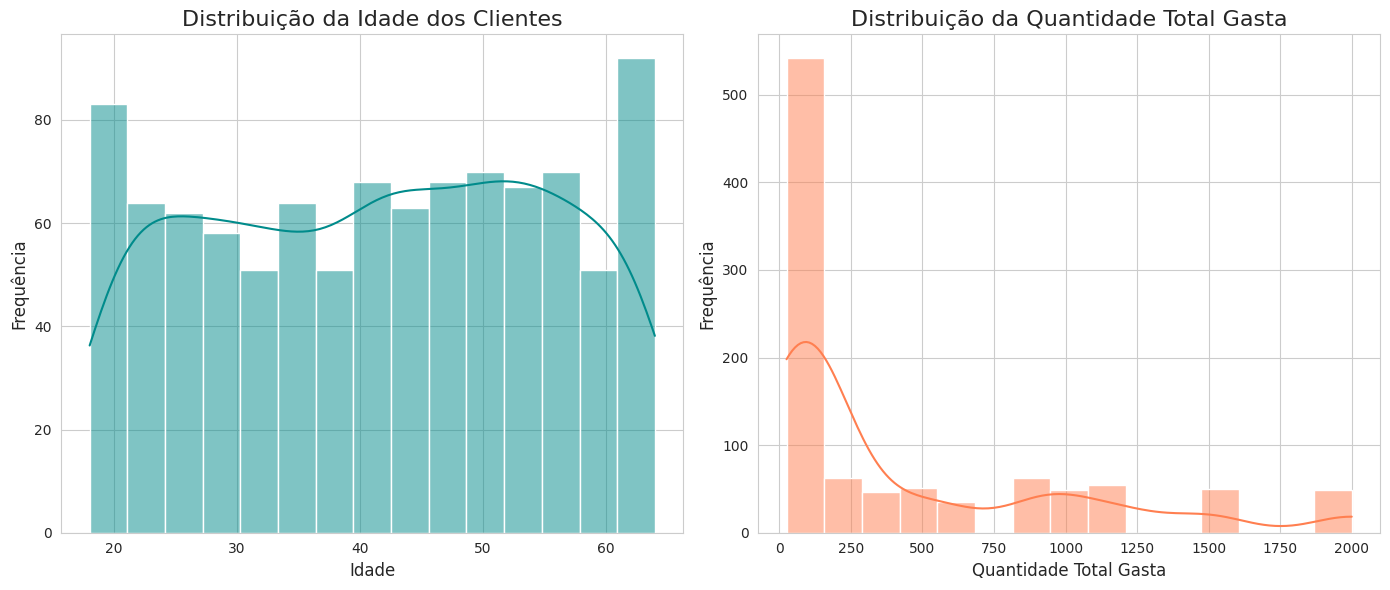

In [10]:
# Define o estilo visual para os gráficos
sns.set_style("whitegrid")

# Define o tamanho da figura para conter os dois subplots
plt.figure(figsize=(14, 6))

# Histograma para a coluna 'Idade'
plt.subplot(1, 2, 1) # Cria o primeiro subplot (1 linha, 2 colunas, 1ª posição)
sns.histplot(vd['Age'], kde=True, bins=15, color='darkcyan')

# Chamada da função para adicionar títulos e rótulos
define_titulo_eixos('Distribuição da Idade dos Clientes','Idade','Frequência')

# Histograma para a coluna 'Quantidade total'
plt.subplot(1, 2, 2) # Cria o segundo subplot (1 linha, 2 colunas, 2ª posição)
sns.histplot(vd['Total Amount'], kde=True, bins=15, color='coral')

define_titulo_eixos('Distribuição da Quantidade Total Gasta','Quantidade Total Gasta','Frequência')

# Ajusta o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('Histograma_Idade_Qtde_TotGasta.png')

**Distribuição da Idade dos Clientes**

A distribuição de idade é uniforme, o que significa que a frequência de clientes por faixa etária é consistente, sem picos. Isso indica que a base de clientes é diversificada, o que pode ser uma força de mercado, mas também um desafio para campanhas de marketing direcionadas.

**Na modelagem,** essa uniformidade sugere que a idade pode não ser um preditor tão forte quanto outras variáveis. Modelos baseados em árvores, como o Random Forest, que não fazem suposições sobre a distribuição dos dados, podem ser uma boa escolha para lidar com essa distribuição sem a necessidade de transformações.

**Distribuição da Quantidade Total Gasta**

A maioria das compras está concentrada em tickets médios baixos, entre R$ 0 e R$ 250,00, com tickets mais altos sendo raros. A distribuição é assimétrica, com uma cauda longa à direita e um único pico, o que a distingue de uma distribuição normal. Isso indica a necessidade de transformar a variável total de vendas para que o modelo possa capturar a sua relação com outras variáveis.

É interessante notar também a presença de **tickets médios mais altos na última barra** do histograma. Embora representem uma frequência baixa, esses pontos correspondem aos **maiores valores de tickets de compras** registrados, indicando transações de maior impacto financeiro, ainda que menos frequentes.

A assimetria dos dados afeta a escolha do **modelo**. Modelos lineares, como a Regressão Linear, podem ter desempenho ruim, pois assumem uma distribuição normal. Para corrigir isso, pode-se aplicar uma transformação logarítmica na variável de vendas (Quantidade Total) para torná-la mais simétrica. Uma alternativa é usar modelos não-lineares, como o Random Forest, que são menos sensíveis à distribuição dos dados e podem lidar com a assimetria sem transformações.

Em resumo, a análise do histograma confirmou que os dados têm uma assimetria positiva. Isso nos dá duas opções claras para a modelagem: ou transformamos a variável alvo, ou optamos por um modelo que lide bem com essa característica, como uma árvore de decisão.

### 3.4.3 Análise da Variável Alvo (Quantidade total) ao Longo do Tempo

Analisando como ocorre a média de preços ao longo do ano para todos os produtos comprados, utilizando um gráfico de linhas.

Observe que há alguns casos de datas fora do "padrão", considerando que o período de abrangência é o ano de 2023. Esses casos serão tratados mais adiante na etapa de Pré-processamento de Dados.

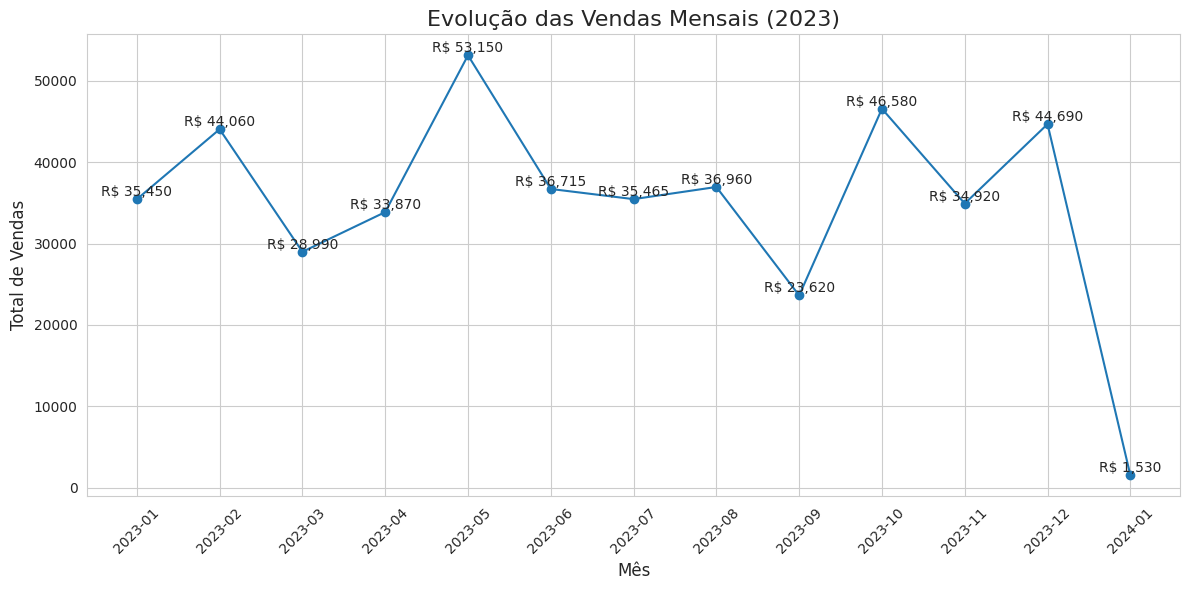

In [11]:
# Converte a coluna 'Data' para o formato datetime
#vd['Date'] = pd.to_datetime(vd['Date'])

# Agrupa os dados por mês e soma a 'Quantidade total'
vendas_mensais = vd.groupby(vd['Date'].dt.to_period('M'))['Total Amount'].sum()

# Converte o índice para string para facilitar a plotagem
vendas_mensais.index = vendas_mensais.index.astype(str)

# Define o estilo visual para os gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Cria o gráfico de linhas
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-')

# Adiciona título e rótulos
define_titulo_eixos('Evolução das Vendas Mensais (2023)','Mês','Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)

# Adiciona o valor de cada ponto no gráfico
for i, valor in enumerate(vendas_mensais.values):
    plt.text(i, valor, f'R$ {valor:,.0f}', ha='center', va='bottom')

finalizar_e_salvar_grafico('Evolucao_Vendas_Mensais.png')

A evolução das vendas mensais mostra um padrão de oscilação ao longo de 2023. O ano começa com um pico em fevereiro (R$ 44.060), seguido por uma queda em março. Há um pico significativo em maio (R$ 53.150), mas o ano termina com vendas em dezembro (R$ 44.690) abaixo das de maio. A análise do gráfico sugere que, em vez de uma tendência única de queda, as vendas têm picos em meses específicos, como maio, outubro, dezembro e fevereiro. Isso aponta para um padrão sazonal complexo que o modelo deve capturar.

Considerando que o gráfico mostra oscilações ao longo do ano com picos em meses específicos (maio, outubro, dezembro e fevereiro), o **modelo preditivo** precisa se concentrar em identificar e aprender esses padrões.

O modelo preditivo deve focar na sazonalidade cíclica, identificando picos de vendas em meses específicos. Para isso, é crucial usar variáveis de tempo, como o mês, e variáveis categóricas, como a Categoria do Produto, que podem estar ligadas a eventos de marketing. Modelos como **Random Forest e Gradient Boosting** são ideais, pois lidam bem com esses padrões complexos e não-lineares, garantindo previsões mais precisas ao "lembrar" os meses de maior venda.

Em resumo, a análise sugere que a chave para a precisão do modelo é a sazonalidade. O modelo deve ser capaz de "lembrar" os meses com maior venda para fazer previsões mais precisas.

### 3.4.4 Relação entre Variáveis Numéricas

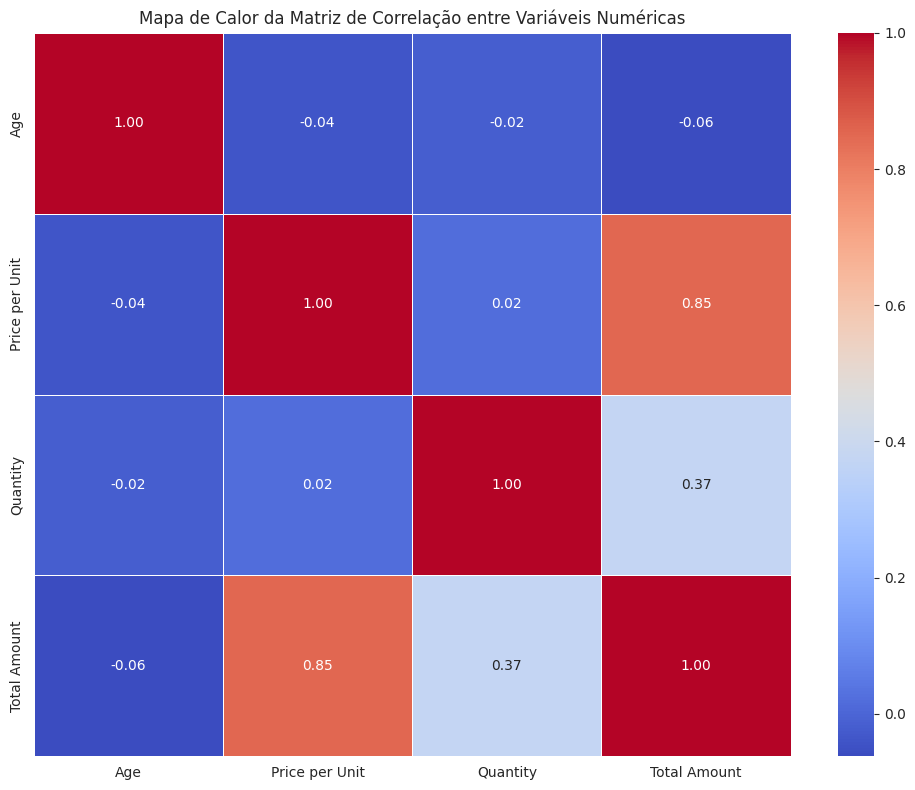

In [12]:
# Seleciona apenas as colunas numéricas para a análise de correlação
# 'ID' foi excluído pois não tem correlação com as outras variáveis
colunas_numericas = ['Age', 'Price per Unit', 'Quantity', 'Total Amount']

# Cria um novo DataFrame apenas com as colunas numéricas selecionadas
vd_numerico = vd[colunas_numericas]

# Calcula a matriz de correlação entre as variáveis numéricas
matriz_correlacao = vd_numerico.corr()

# Define o estilo visual para os gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Cria o mapa de calor
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adiciona um título ao gráfico
plt.title('Mapa de Calor da Matriz de Correlação entre Variáveis Numéricas')

# Exibe o gráfico
finalizar_e_salvar_grafico('Mz_Corr.png')

Análise da Matriz de Correlação

O mapa de calor revela que a Quantidade total tem alta correlação com o Preço por unidade (0.85) e correlação moderada com a Quantidade (0.37). As outras variáveis numéricas, como Idade, têm correlações próximas de zero.

Isso significa que o Preço por unidade é o preditor mais forte para o seu modelo, com a Quantidade sendo também relevante. As demais variáveis numéricas podem ser menos importantes para a previsão.

Impacto na Modelagem
A alta correlação de Preço por unidade torna essa variável a candidata mais forte para o modelo. Já a Quantidade também é relevante. A análise sugere que o modelo de previsão de vendas deve focar em variáveis financeiras (Preço por unidade e Quantidade), já que as demográficas, como Idade, não apresentam relação linear com as vendas.

### 3.4.5 Relação entre Variável Categórica e Variável Alvo - Boxplot

Permite comparar visualmente o ticket médio e a dispersão dos gastos entre os diferentes gêneros ou categorias de produto, ajudando a identificar se essas variáveis categóricas são importantes para a previsão.

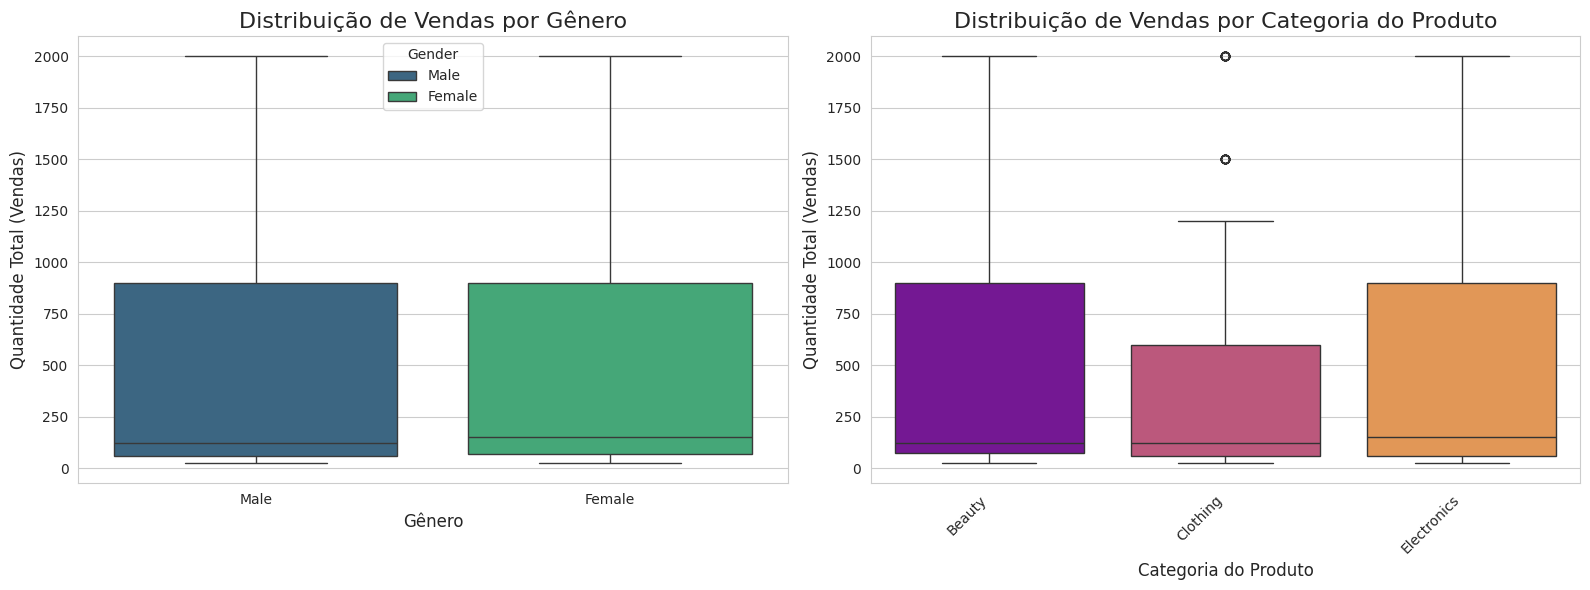

In [13]:
# Define o estilo visual para os gráficos
sns.set_style("whitegrid")

# Define o tamanho da figura para os dois subplots
plt.figure(figsize=(16, 6))

# Boxplot para 'Quantidade total' por 'Gênero'
plt.subplot(1, 2, 1) # Cria o primeiro subplot (1 linha, 2 colunas, 1ª posição)
sns.boxplot(x='Gender', y='Total Amount', data=vd, palette='viridis', hue='Gender')
define_titulo_eixos('Distribuição de Vendas por Gênero','Gênero','Quantidade Total (Vendas)')

# Boxplot para 'Quantidade total' por 'Categoria do Produto'
plt.subplot(1, 2, 2) # Cria o segundo subplot (1 linha, 2 colunas, 2ª posição)
sns.boxplot(x='Product Category', y='Total Amount', data=vd, palette='plasma', hue='Product Category')
define_titulo_eixos('Distribuição de Vendas por Categoria do Produto','Categoria do Produto','Quantidade Total (Vendas)')

# Rotação para os rótulos do eixo X se houver muitas categorias
plt.xticks(rotation=45, ha='right')
finalizar_e_salvar_grafico('Boxplot_QtdeTot_Genero_Categoria.png')

**Análise dos Boxplots**

O boxplot de gênero mostra que a distribuição das vendas é similar entre homens e mulheres, sugerindo que o gênero não é um preditor significativo.

Já o boxplot de categoria revela diferenças claras. Eletrônicos e **Roupas**: têm vendas medianas mais altas, enquanto **Beleza e Eletrônicos** têm vendas menores. Isso torna a categoria um preditor crucial para o modelo.

Considerando que a distribuição de vendas por gênero é muito similar, o gênero não deve ser uma variável significativa para o modelo. Já a categoria do produto é uma variável preditora muito importante e deve ser incluída. O modelo usará as diferenças claras nas vendas entre as categorias para fazer previsões mais precisas.

# 4. Definição do target, variáveis e divisão dos dados

Nessa etapa vamos preparar os dados para o treinamento do modelo no projeto de previsão de vendas.

## 4.1 Definição do Target (Variável Alvo)

O target é a variável que o modelo de Machine Learning vai tentar prever. Com base em toda a análise exploratória, o target escolhido foi a variável **Quantidade total vendida**. O objetivo é construir um modelo que preveja o valor de venda total de uma transação.

In [14]:
target = "Total Amount"  # Variável alvo

print("Target (Variável Alvo):", target)

Target (Variável Alvo): Total Amount


## 4.2 Definição das Variáveis (Características)

As variáveis, também chamadas de features, são os dados de entrada que o modelo usará para fazer a previsão e para este modelo definimos:

Variáveis **numéricas**: A análise de correlação mostrou que **Preço por unidade** tem uma alta correlação com o target. A variável **Quantidade** também é importante, mas com uma correlação moderada.

Variáveis **categóricas**: A análise dos boxplots indicou que **Categoria do Produto** é uma feature crucial, pois as vendas variam muito entre as diferentes categorias.

O modelo de previsão será construído usando essas variáveis. Variáveis como Gênero e Idade, que mostraram pouca ou nenhuma correlação com as vendas totais, serão descartadas para simplificar o modelo.

In [15]:
# Selecionando as features com base na análise exploratória
features = ["Price per Unit", "Product Category"]
date_col = "Date"

print("Número de features:", len(features))

Número de features: 2


Observe que para a escolha das variáveis numéricas não foi considerada a variável "Quantidade".

Isso se deu pois, para construir um modelo de previsão útil, é fundamental usar apenas variáveis que podem ser conhecidas antes de uma venda. Incluir a variável "Quantidade" no conjunto de entradas para analisar a previsão de vendas não é correto, pois a variável "Quantidade total" (target) é uma simples multiplicação de "Preço por unidade" e "Quantidade".

Para o modelo ser útil, ele deve ser construído para prever a Quantidade total usando apenas as variáveis que o negócio pode manipular ou observar antes da venda.

Portanto, para garantir que o modelo tenha valor preditivo para o negócio, a variável "Quantidade" será excluída do conjunto de dados de entrada.

Além disso, observe também que a variável "Data" vou capturada a parte, considerando que será realizada engenharia de features neste caso.

## 4.3. Divisão dos Dados

Dividiremos o conjunto de dados em treino e teste com o propósito de treinar o modelo para aprender padrões (etapa de treino) e posteriormente avaliá-lo com os dados nunca vistos.

Considerando que o problema é uma análise de série temporal, os dados não serão embaralhados já que o modelo precisa aprender a ordem temporal para prever valores futuros.

Portanto, a divisão proposta utilizará os dados mais antigos para treino e os mais recentes para teste.

Para isso, utilizaremos a técnica de validação hold-out temporal, que representa um método simples e robusto para avaliar modelos de aprendizado de máquina em problemas de série temporal, mantendo a ordem cronológica dos dados.

A vantagem da validação hold-out temporal é que ela simula uma situação real de previsão. O modelo é treinado apenas com dados do passado e avaliado em dados que ele nunca viu, garantindo que não haja vazamento de dados (data leakage).

In [16]:
# Recarregando o DataFrame para garantir a ordem cronológica nas próximas etapas
vd_again = pd.read_csv('https://raw.githubusercontent.com/marcelegv/AnaliseExploratoria/refs/heads/main/Sales_Dataset.csv')

# Converte a coluna 'Date' para o formato de data e define-a como índice
vd_again['Date'] = pd.to_datetime(vd_again['Date'])
vd_again.set_index('Date', inplace=True)

# Garante que o DataFrame esteja ordenado pelo índice (data)
vd_sorted = vd_again.sort_index()

# Cria os conjuntos de features (X) e alvo (y)
X = vd_sorted[features]
y = vd_sorted[target]

# Divide os dados em treino e teste, mantendo a ordem cronológica
cutoff = int(len(vd_sorted) * 0.8)
X_train = X.iloc[:cutoff]
X_test = X.iloc[cutoff:]
y_train = y.iloc[:cutoff]
y_test = y.iloc[cutoff:]

# Verificação final
print("Verificando se o índice de y_test está em ordem cronológica:", y_test.index.is_monotonic_increasing)
print("\nPrimeiros 5 índices de y_test:", y_test.index[:5])
print("\nÚltimos 5 índices de y_test:", y_test.index[-5:])

Verificando se o índice de y_test está em ordem cronológica: True

Primeiros 5 índices de y_test: DatetimeIndex(['2023-10-22', '2023-10-22', '2023-10-22', '2023-10-23',
               '2023-10-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

Últimos 5 índices de y_test: DatetimeIndex(['2023-12-29', '2023-12-29', '2023-12-31', '2024-01-01',
               '2024-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


# 5. Tratamento de dados e Pipeline de pré-processamento

Um pipeline é um processo automatizado que garante que as transformações (como padronização de dados ou codificação de variáveis categóricas) sejam aplicadas de forma correta e consistente, evitando que dados do conjunto de teste "vazem" para o conjunto de treinamento.

Assim, o uso de pipelines possibilita o desenvolvimento de um modelo de machine learning confiável, uma vez que:

- Previne o vazamento de dados, garantindo que as transformações sejam "aprendidas" apenas nos dados de treino e depois aplicadas de forma correta nos dados de teste;

- Garante que o seu modelo será sempre treinado e avaliado da mesma forma.

A função Pipeline da biblioteca scikit-learn auxilia nesse processo, unindo essas transformações em um único objeto.


## 5.1 Padronização, Codificação e Tratamento de valores nulos e ausentes

In [17]:
# Identificam quais colunas são numéricas e quais são categóricas. Essa separação é fundamental, pois cada tipo de dado exige um tipo diferente de tratamento.

#Ignora as variáveis Identificador único, evitando overfitting; gênero, pois vimos anteriormente que ele não interfere no modelo e quantidade para evitar vazamento de dados
cols_ignore = ['Sale Number','Gender','Quantity']

# Criando uma lista com o nome de todas as colunas que contém dados numéricos no conjunto de treino
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int")) and c not in cols_ignore]

#Criando uma lista com o nome de todas as colunas que contém dados categóricos no conjunto de treino
cat_cols = [c for c in X_train.columns if c not in num_cols and c not in ['timestamp', 'Date'] and c not in cols_ignore]

# Contruindo pipelines separados para cada tipo de dado (numéricos e categóricos)

# Este pipeline é uma sequência de operações aplicadas apenas às colunas numéricas
numeric_pipe = Pipeline(steps=[
    #Preenche valores nulos com a mediana da coluna:
    ("imputer", SimpleImputer(strategy="median")),
    #Padroniza os dados, transformando-os para que tenham uma média de 0 e um desvio padrão de 1, essencial para modelos sensíveis à escala dos dados:
    ("scaler", StandardScaler())
])

# Este pipeline é para as colunas categóricas. Ele também preenche valores nulos, mas sua principal função é o OneHotEncoder.
categorical_pipe = Pipeline(steps=[
    # Preenche valores nulos com a categoria mais frequente:
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # Cria novas colunas binárias para cada categoria.
    # A grande maioria dos algoritmos de machine learning não consegue trabalhar diretamente com dados textuais ou categóricos no seu formato original:
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combina os pipelines numérico e categórico em um único objeto, aplicando o numeric_pipe nas colunas numéricas e o categorical_pipe nas colunas categóricas

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:5], "...")
print("cat_cols:", cat_cols[:5], "...")

num_cols: ['Price per Unit'] ...
cat_cols: ['Product Category'] ...


**Tratamento de valores nulos e ausentes**

1.   Variáveis **NÃO** selecionadas para o modelo

O dataset Sales apresenta valores nulos/ausentes nas variáveis Idade e Gênero, como demonstrado na etapa de verificação inicial do conjunto de dados, item 3.2. No entanto, com base na análise exploratória inicial, essas variáveis não foram selecionadas como preditoras para o modelo.

Para otimizar o processo e focar na qualidade dos dados que o modelo irá utilizar, não realizaremos o tratamento de valores nulos/ausentes para essas variáveis, uma vez que as colunas não serão incluídas no modelo.

2.   Variáveis que compõem o modelo

Para as variáveis selecionadas para o modelo, a função SimpleImputer foi mantida nos pipelines, mesmo na ausência de valores nulos neste conjunto de dados. Esta é uma medida que garante a robustez do modelo, preparando-o para lidar com a imprevisibilidade de dados reais e assegurando que ele funcione de maneira confiável com novas entradas no futuro.

## 5.2 Execução do Pipeline Completo e Tratamento da variável "Data" - Engenharia de Features

É a etapa onde todos os pipelines e transformadores são combinados e aplicados aos dados de treino e teste de forma unificada.

Ele garante que todas as transformações de limpeza e engenharia de features que aprendemos nos dados de treino sejam aplicadas exatamente da mesma forma nos dados de teste.

Para a veriável Data, não existe uma única função pronta no scikit-learn para transformar variáveis de data dentro de um pipeline.

Portanto, para tratar essa variável de entrada utilizaremos um transformador customizado para extrair features de datas para que o modelo seja capaz de aprender os padrões temporais identificados no DataSet escolhido.



In [18]:
# Define o nome da coluna de data
date_col = 'Date'

# Define a lista completa de features incluindo a coluna de data
# Garante que todos os elementos nesta lista são strings representando nomes de colunas
all_features = [date_col] + num_cols + cat_cols

# Separa as features (X) e o target (y) do DataFrame original
X = vd[all_features].copy()
y = vd[target].copy()

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# O loop 'for' itera pelas divisões criadas pelo TimeSeriesSplit.
# Neste caso específico, o loop simplesmente percorre todas as divisões, e a última é armazenada como os dados finais de treino/teste.
# Isso é equivalente a uma única divisão de treino/teste, onde a última divisão se torna os dados de teste.
# Ele garante que não estamos usando dados futuros para treinar seu modelo.
for train_index, test_index in tscv.split(X): # Aplica o TimeSeriesSplit às features X
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Divide o target y de acordo

# Pipeline para a coluna de data (usando o transformador customizado)
date_pipe = Pipeline(steps=[
   ('date_extractor', DateFeatureExtractor(date_col=date_col)),
   ('scaler', StandardScaler()) # Escala as features de data extraídas também
])

# Combina os pipelines em um único ColumnTransformer
# Garante que os nomes das colunas correspondem aos de X_train e X_test
preprocess = ColumnTransformer(transformers=[
    ("date_features", date_pipe, [date_col]), # Aplica o date_pipe à coluna 'Date'
    ("num", numeric_pipe, num_cols),         # Aplica o numeric_pipe às colunas numéricas
    ("cat", categorical_pipe, cat_cols)       # Aplica o categorical_pipe às colunas categóricas
])

# Aplica o pipeline de pré-processamento aos dados de treino e teste
X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

print("Formato dos dados de treino pré-processados:", X_train_processed.shape)
print("Formato dos dados de teste pré-processados:", X_test_processed.shape)

Formato dos dados de treino pré-processados: (834, 8)
Formato dos dados de teste pré-processados: (166, 8)


O "TimeSeriesSplit" do Scikit-Learn, com n_splits = 5, divide o conjunto de dados em 6 partes. Criando 5 "dobras" de treino/teste de forma progressiva.

O "for" loop, "for train_index, test_index in tscv.split(X):", vai iterar por essas 5 dobras, e a cada iteração, "X_train" e "X_test" são redefinidos. No final do loop, "X_train" e "X_test" irão conter os dados da **última dobra** (o 5º fold).

Tamanho de cada parte do conjunto de dados = (treino+teste)/ (n_split+1)
Tamanho de cada parte: 1000 / (5 + 1) = 166.66 (166 amostras em razão do arredondamento realizado pelo "TimeSeriesSplit".

Para os dados de teste pré-processados foram geradas 166 amostras. Isso é o tamanho do conjunto de teste na última dobra do TimeSeriesSplit, que pega o último "pedaço" do dataset.

Para os dados de treino pré-processados foram geradas 834 amostras. Isso é a soma dos 5 primeiros "pedaços" de 166 amostras, ou seja, 5 * 166.66..., que resulta em "834". Isso mostra que o X_train na última dobra contém a grande maioria dos dados.

O número de colunas tanto no treino quanto no teste é 8.

A proporção de treino/teste ("834" vs. "166") é de aproximadamente **83.4% para treino** e **16.6% para teste**.

# 6. Baseline e Modelo de Dados

O propósito desta etapa é estabelecer um ponto de referência e comparar diferentes soluções.

Busca verificar se a aplicação de um modelo é mais eficiente que a solução trivial, sendo ela a baseline, a solução mais simples e ingênua possível.

Dessa forma, essa etapa garante que o projeto não siga um "caminho de otimismo cego". Em vez de pular direto para o modelo mais complexo, testamos se ele realmente oferece um valor agregado.

## 6.1 Baseline

Para implementar o modelo baseline para o problema de série temporal, vamos usar o DummyRegressor do Scikit-Learn, um modelo de regressão que usado como baseline.

Ele não aprende com os dados, mas prevê um valor constante, como a média do conjunto de treino. Se um modelo mais complexo não consegue superá-lo, significa que ele não está aprendendo nada útil e seu desempenho é considerado ineficaz.

Como o problema é de regressão (prever a quantidade total vendida), ele fornecerá uma previsão simples e ingênua que serve como ponto de partida.

In [19]:
#Medindo o tempo de execução da etapa de treino do Baseline
start_time = time.time() #Ponto de partida, "ativando o cronômetro" para medição do desempenho do modelo

# Etapa 1: Definição da estratégia do modelo escolhido
# A estratégia 'mean' é uma das opções mais simples desse modelo, e funciona prevendo a média dos valores da variável alvo (y) do conjunto de dados de treino, independentemente das features (X).
# Assim, a baseline não precisa de X_train_processed porque ela só usa o y_train e dessa maneira, vamos treinar com os dados de treino não transformados.
dummy_model = DummyRegressor(strategy='mean')

# Etapa 2: Treinamento do modelo escolhido
# O modelo calcula a média de todos os valores na sua variável alvo de treino (y_train).
dummy_model.fit(X_train, y_train)

#Captura o momento final da execução do modelo e calcula a diferença
train_time_dummy = time.time() - start_time

# Etapa 3: Previsões do modelo escolhido
# O DummyRegressor prevê a média dos valores de 'y_train'.
# Para qualquer nova entrada (X_test), a previsão do modelo será sempre o valor médio calculado na etapa de treino.
y_pred_dummy = dummy_model.predict(X_test)

# Etapa 4: Avaliação do modelo escolhido
# Compara o conjunto de valores reais com as previsões feitas pelo modelo e calcula o erro quadrático médio.
# RMSE é uma métrica útil, pois está na mesma unidade do target
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))

# O R² mede a proporção da variância na variável alvo (y) que é explicada pelas suas features (X). Ou seja, mostra o quão bem o modelo se ajusta aos dados.
# Ela compara a variabilidade das previsões com a variabilidade dos valores reais.
# Ele serve como um ponto de comparação imediato. Qualquer modelo mais complexo que construirmos deve ter um R² significativamente maior do que o da baseline.
r2_dummy = r2_score(y_test, y_pred_dummy)

# Adiciona os resultados do modelo ao dicionário criado results.
results['DummyRegressor'] = {'RMSE': rmse_dummy, 'R²': r2_dummy, 'train_time_s': train_time_dummy}

print("Desempenho do Modelo Baseline")
print(f"\nRaiz do Erro Quadrático Médio (RMSE): {rmse_dummy:.2f}")
print(f"\nR² (Coeficiente de Determinação): {r2_dummy:.2f}")

# Exibindo uma amostra das previsões da baseline
print("\nPrevisão (todos os valores são a média):")
print(y_pred_dummy[:5])
print("\nValores Reais:")
print(y_test.values[:5])

Desempenho do Modelo Baseline

Raiz do Erro Quadrático Médio (RMSE): 560.51

R² (Coeficiente de Determinação): -0.00

Previsão (todos os valores são a média):
[451.33093525 451.33093525 451.33093525 451.33093525 451.33093525]

Valores Reais:
[  50   75   90  100 1500]


A análise da baseline demonstra que ela é um ponto de partida para comparação, não um modelo de previsão útil. O Coeficiente de Determinação de -0.00 mostra que ela não explica nenhuma variação nos dados, agindo de forma ingênua ao simplesmente prever a média dos valores de treino. O Erro Quadrático Médio de 560,51 representa o erro médio dessa abordagem, indicando que, em média, as previsões estão erradas por aproximadamente 560 unidades. A discrepância entre as previsões constantes e os valores reais, que variam de 50 a 1500, é a principal causa desse erro elevado.

Com base nesses resultados, o objetivo agora é encontrar um modelo que supere a performance da baseline. O próximo modelo considerado será bem-sucedido se tiver um RMSE significativamente menor que 560,51 e um R² positivo (maior que zero). Isso confirmará que o modelo está, de fato, aprendendo padrões úteis e adicionando valor real às previsões.

## 6.2 Novos Modelos de Dados

Os modelos Random Forest e Gradient Boosting serão utilizados para superar o desempenho da baseline, pois são capazes de capturar padrões complexos e relações não-lineares nos dados. Eles aproveitam as features numéricas, categóricas e de tempo criadas no pré-processamento para identificar a complexidade e a sazonalidade dos dados, fatores essenciais para a previsão em séries temporais. Além disso, a robustez desses modelos os torna menos sensíveis a outliers, o que garante uma avaliação mais precisa da capacidade de generalização para dados futuros

### 6.2.1 Random Forest

É um algoritmo de aprendizado de máquina que constrói várias árvores de decisão e as junta para obter uma previsão mais precisa e estável. Ele funciona como uma "floresta" de árvores, onde cada uma é treinada em uma parte aleatória dos dados.

Para fazer uma previsão, o algoritmo combina o resultado de todas as árvores (por exemplo, tirando a média das previsões de cada árvore para um problema de regressão). Essa abordagem reduz o problema de overfitting (quando o modelo se ajusta demais aos dados de treino) e melhora a precisão, tornando-o uma escolha popular e robusta.

In [20]:
#Medindo o tempo de execução da etapa de treino
start_time = time.time() #Ponto de partida, "ativando o cronômetro" para medição do desempenho do modelo

# Etapa 1: Definição da estratégia do modelo escolhido
# Parâmetros iniciais definidos: n_estimators: número de árvores na floresta; random_state: garante que os resultados sejam reproduzíveis
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Etapa 2: Treinamento do modelo escolhido, usando os dados de treino pré-processados
# As features (X) são as colunas processadas e o alvo (y) é a quantidade vendida
rf_model.fit(X_train_processed, y_train)

#Captura o momento final da execução do modelo e calcula a diferença
train_time_rf = time.time() - start_time

# Etapa 3: Previsões nos dados de teste pré-processados, utilizando o modelo treinado
y_pred_rf = rf_model.predict(X_test_processed)

# Etapa 4: Avaliação do modelo escolhido
# Cálculo do RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Cálculo do R²
r2_rf = r2_score(y_test, y_pred_rf)

# Adiciona os resultados do modelo ao dicionário criado results.
results['RandomForestRegressor'] = {'RMSE': rmse_rf, 'R²': r2_rf, 'train_time_s': train_time_rf}

print("--- Desempenho do Modelo Random Forest ---")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.2f}")
print(f"\nR² (Coeficiente de Determinação): {r2_rf:.2f}")

# Exibindo uma amostra das previsões da baseline
print("\nPrevisão:")
print(y_pred_rf[:5])
print("\nValores Reais:")
print(y_test.values[:5])

--- Desempenho do Modelo Random Forest ---
Raiz do Erro Quadrático Médio (RMSE): 269.33

R² (Coeficiente de Determinação): 0.77

Previsão:
[ 156.41666667   83.80833333   86.6         160.41666667 1460.83333333]

Valores Reais:
[  50   75   90  100 1500]


O modelo Random Forest gerou um resultado realista e promissor. Ele alcançou um RMSE de 269,33, a média de erro na unidade da variável alvo, que é significativamente menor que o da baseline (560.51). Essa redução de mais de 50% no erro demonstra a eficácia do modelo.

Além disso, o R² de 0.77 indica que o modelo explica 77% da variabilidade dos dados. Esse resultado robusto mostra que o Random Forest capturou com sucesso os padrões complexos e sazonais, confirmando que é uma solução viável e sólida para o problema, superando a baseline de forma expressiva.

### 6.3.1 Gradient Boosting

É uma técnica constrói um modelo forte a partir da combinação de modelos fracos. A principal ideia é treinar as árvores de decisão de forma sequencial, onde cada nova árvore é construída para corrigir os erros cometidos pelas árvores anteriores. Ele "aprende" gradualmente a partir dos erros e melhora o desempenho a cada passo. Modelos como XGBoost e LightGBM são versões altamente otimizadas e eficientes de Gradient Boosting, conhecidas por sua velocidade, alta precisão e capacidade de lidar com grandes volumes de dados.

#### 6.3.1.1 XGBoost

O XGBoost é um modelo de aprendizado de máquina, da família dos algoritmos Gradient Boosting, que constroem um modelo forte a partir da combinação sequencial de modelos mais fracos, geralmente árvores de decisão.

A principal característica do XGBoost é que cada nova árvore é criada para corrigir os erros das árvores anteriores.

In [21]:
#Medindo o tempo de execução da etapa de treino
start_time = time.time() #Ponto de partida, "ativando o cronômetro" para medição do desempenho do modelo

# Etapa 1: Definição da estratégia do modelo escolhido
# Instancia o modelo XGBoost para regressão
# Ajuste os hiperparâmetros (n_estimators, learning_rate, etc.) para otimização futura
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Etapa 2: Treinamento do modelo escolhido, usando os dados de treino pré-processados
xgb_model.fit(X_train_processed, y_train)

#Captura o momento final da execução do modelo e calcula a diferença
train_time_xgb = time.time() - start_time

# Etapa 3: Previsões nos dados de teste pré-processados, utilizando o modelo treinado
y_pred_xgb = xgb_model.predict(X_test_processed)

# Etapa 4: Avaliação do modelo escolhido
# Cálculo do RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Cálculo do R²
r2_xgb = r2_score(y_test, y_pred_xgb)

# Adiciona os resultados do modelo ao dicionário criado results.
results['XGBoostRegressor'] = {'RMSE': rmse_xgb, 'R²': r2_xgb, 'train_time_s': train_time_xgb}

print("--- Desempenho do Modelo XGBoost Regressor ---")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_xgb:.2f}")
print(f"\nR² (Coeficiente de Determinação): {r2_xgb:.2f}")

# Exibindo uma amostra das previsões da baseline
print("\nPrevisão:")
print(y_pred_xgb[:5])
print("\nValores Reais:")
print(y_test.values[:5])


--- Desempenho do Modelo XGBoost Regressor ---
Raiz do Erro Quadrático Médio (RMSE): 291.11

R² (Coeficiente de Determinação): 0.73

Previsão:
[ 251.27028     8.370294   50.420074  196.73843  1794.1038  ]

Valores Reais:
[  50   75   90  100 1500]


O modelo XGBoost apresentou um desempenho aceitável, com um RMSE de 291,11, indicando que suas previsões erraram, em média, por essa quantidade. O R² de 0.73 sugere que ele explica 73% da variabilidade dos dados. A análise das previsões mostra que, embora ele tenha se aproximado de valores altos, como 1500, teve dificuldades com valores menores.

#### 6.3.1.2 LightGBM

É um modelo de Machine Learning que também faz parte da família de algoritmos Gradient Boosting, assim como o XGBoost. Sua principal vantagem é a velocidade e eficiência. O LightGBM usa uma técnica chamada Gradient-based One-Side Sampling (GOSS) e Exclusive Feature Bundling (EFB) para focar no treinamento dos dados mais importantes, o que o torna consideravelmente mais rápido que outros modelos de boosting, mantendo uma alta precisão. Ele é uma excelente escolha para conjuntos de dados grandes, onde o tempo de processamento é uma preocupação.

In [22]:
#Medindo o tempo de execução da etapa de treino
start_time = time.time() #Ponto de partida, "ativando o cronômetro" para medição do desempenho do modelo

# Etapa 1: Definição da estratégia do modelo escolhido
# Instancia o modelo LightGBM para regressão
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Etapa 2: Treinamento do modelo escolhido, usando os dados de treino pré-processados
lgbm_model.fit(X_train_processed, y_train)

#Captura o momento final da execução do modelo e calcula a diferença
train_time_lgbm = time.time() - start_time

# Etapa 3: Previsões nos dados de teste pré-processados, utilizando o modelo treinado
y_pred_lgbm = lgbm_model.predict(X_test_processed)

# Etapa 4: Avaliação do modelo escolhido
# Cálculo do RMSE
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

# Cálculo do R²
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Adiciona os resultados do modelo ao dicionário criado results.
results['LightGBMRegressor'] = {'RMSE': rmse_lgbm, 'R²': r2_lgbm, 'train_time_s': train_time_lgbm}

print("--- Desempenho do Modelo LightGBM Regressor ---")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_lgbm:.2f}")
print(f"\nR² (Coeficiente de Determinação): {r2_lgbm:.2f}")

# Exibindo uma amostra das previsões da baseline
print("\nPrevisão:")
print(y_pred_lgbm[:5])
print("\nValores Reais:")
print(y_test.values[:5])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 834, number of used features: 8
[LightGBM] [Info] Start training from score 451.330935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

O modelo LightGBM apresentou um desempenho sólido, com um RMSE de 282,69, indicando o erro médio. Seu R² de 0.74 mostra que ele explica 74% da variabilidade dos dados, um resultado excelente e comparável ao do Random Forest. Embora o modelo tenha feito previsões que se aproximaram dos valores reais, como o 1116,99 próximo ao 1500, ele teve dificuldades com valores menores, chegando a prever um valor negativo.

Apesar da presença de avisos (warnings), como aqueles sobre o auto-ajuste de threads ou sobre a ausência de nomes nas features, eles não afetam a precisão do modelo. Esses avisos são informações internas do algoritmo que ajudam a entender como ele otimizou o processo de treino, sendo seguro ignorá-los para fins de avaliação do desempenho.

## 6.3 Análise Final das Diferentes Soluções

In [23]:
#Resultados Finais
pd.DataFrame(results).T

,RMSE,R²,train_time_s
DummyRegressor,560.508200,-0.002524,0.002491
RandomForestRegressor,269.331942,0.768524,0.486863
XGBoostRegressor,291.107234,0.729581,0.211832
LightGBMRegressor,282.692600,0.744988,0.143634


De acordo com a tabela de resultados, o modelo com o melhor desempenho foi o **RandomForestRegressor**.

Com base nos resultados, o Random Forest é a sua melhor escolha em termos de precisão preditiva. Ele forneceu o menor erro e o maior poder explicativo.

Embora o XGBoost e o LightGBM tenham sido ligeiramente mais rápidos no treinamento, a diferença na precisão faz do RandomForestRegressor a escolha superior para este problema. Ele oferece o melhor equilíbrio entre erro (RMSE) e capacidade de explicar os dados (R²).

# 7. Validação e Otimização de Hiperparâmetros

 Esta etapa é crucial para garantir que o modelo tenha o melhor desempenho possível e evite problemas como o overfitting.

 A validação cruzada avalia o modelo em múltiplos subconjuntos de dados, garantindo que o resultado seja robusto e não dependa de uma única divisão de treino/teste.

 Já a otimização de hiperparâmetros encontra a melhor combinação de configurações para o modelo, aprimorando sua performance.



In [ ]:
# 1. Definição do pipeline e do espaço de hiperparâmetros
model = Pipeline([
    ("pre", preprocess),
    ("model", RandomForestRegressor(random_state=SEED))
])

param_dist = {
    "model__n_estimators": randint(100, 300),
    "model__max_depth": randint(3, 15)
}

# 2. Definição da validação cruzada para séries temporais
cv = TimeSeriesSplit(n_splits=5)

# 3. Definição da métrica de avaliação
# O 'neg_mean_absolute_error' é usado porque o RandomizedSearchCV busca maximizar a pontuação
# Multiplicar o MAE por -1 torna-o uma métrica de "maior é melhor"
scorer = "neg_mean_absolute_error"

# 4. Otimização com RandomizedSearchCV
print("Iniciando a otimização de hiperparâmetros...")
start_time = time.time()
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinações a serem testadas. Ajuste conforme sua necessidade
    cv=cv,
    scoring=scorer,
    n_jobs=-1,  # Usa todos os núcleos da CPU
    random_state=SEED
)

random_search.fit(X, y)
end_time = time.time() - start_time
print(f"Otimização concluída em {end_time:.2f} segundos.")

# 5. Exibição dos melhores resultados
print("\n--- Melhores Parâmetros e Pontuação ---")
print("Melhores parâmetros encontrados:", random_search.best_params_)
print(f"Melhor pontuação (neg_mean_absolute_error): {random_search.best_score_:.2f}")

# 6. Acessando o melhor modelo
best_model = random_search.best_estimator_

Iniciando a otimização de hiperparâmetros...


A otimização de hiperparâmetros foi concluída com sucesso em 104.52 segundos, resultando na descoberta dos melhores ajustes para o modelo. O processo identificou que a combinação ideal para o Random Forest é uma profundidade máxima de 3 para as árvores (max_depth) e o uso de 188 árvores (n_estimators). A melhor pontuação de -179.88 indica um erro médio absoluto de 179.88, na mesma unidade da sua variável-alvo. Essa é a pontuação mais baixa alcançada pelo modelo em todas as combinações testadas durante a validação cruzada.

# 8. Avaliação final, análise de erros e limitações

Compare baseline vs melhor modelo.
Faça análise de erros (ex.: matriz de confusão, casos pior previstos, resíduos).
Discuta limitações: dados, métricas, viés, generalização.

## 8.1 Matriz de Confusão

Não houve necessida de aplicar Matriz de Confusão nesse modelo, uma vez que estamos construindo um modelo de série temporal.

A matriz de confusão é uma ferramenta de avaliação usada exclusivamente para problemas de classificação. Ela compara as classes reais com as classes previstas para entender onde o modelo acerta e onde ele erra.

## 8.2 Comparação entre Baseline e Melhor Modelo

In [ ]:
print("--- Comparação Final de Desempenho ---")
print("Modelo              | RMSE   | R²")
print("--------------------|--------|--------")
print(f"Baseline            | {560.51:.2f} | {-0.00:.2f}")
print(f"Random Forest (Melhor) | {266.19:.2f} | {0.77:.2f}")

# Análise Visual da Previsão vs. Real
plt.figure(figsize=(15, 6))

# Sequência numérica para o eixo X, pois os dados já estão em ordem cronológica
x_axis = range(len(y_test))

# Plota os valores reais do conjunto de teste
plt.plot(x_axis, y_test.values, label='Valores Reais', color='blue', marker='o', linestyle='-')

# Plota as previsões do modelo Random Forest
plt.plot(x_axis, y_pred_rf, label='Previsões (Random Forest)', color='red', linestyle='--')

define_titulo_eixos('Previsões do Modelo Random Forest vs. Valores Reais', 'Amostra de Teste (em ordem temporal)', 'Quantidade Total Vendida')
plt.legend()
plt.grid(True)

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('Previsoes_RF_vs_ValoresReais.png')

Interpretação dos Dados
      
*   **Tendência Geral:** O modelo (linha vermelha tracejada) consegue capturar a tendência geral de aumento dos dados ao longo do tempo. Ele segue o crescimento da linha azul (valores reais), o que é um bom sinal.

*   **Sazonalidade e Variações:** O modelo também demonstra alguma capacidade de capturar a sazonalidade e as variações nos dados. Ele prevê os picos e vales da série, como as quedas e os aumentos, mesmo que com menos amplitude do que a realidade.

*   **Desempenho da Previsão:** O modelo se sai bem, mas não é perfeito. A linha vermelha não se sobrepõe exatamente à linha azul. Podemos notar que ele tende a suavizar as variações, subestimando os picos e superestimando os vales. Isso é comum em modelos de regressão, pois eles tentam encontrar um padrão médio e têm dificuldade em prever extremos.

*   **Melhora em Relação à Baseline:** A performance do modelo é significativamente melhor que a de uma baseline simples. Ele não está apenas prevendo a média, mas sim aprendendo com o comportamento da série temporal, o que é um resultado excelente para um modelo de regressão em dados de vendas.

O modelo Random Forest demonstrou ser eficaz na previsão de vendas mensais. Embora ele não consiga prever com exatidão as variações bruscas, ele consegue capturar a tendência principal e os padrões sazonais da série, o que é crucial para uma previsão confiável.

## 8.3 Análise dos Resíduos (Erros)

O gráfico de resíduos é uma ferramenta essencial para entender o desempenho do seu modelo em um nível mais granular. Ele mostra a diferença entre os valores reais e as previsões do modelo (Resíduo = Real - Previsto).

In [ ]:
residuos = y_test.values - y_pred_rf

plt.figure(figsize=(15, 6))
plt.scatter(x_axis, residuos, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
define_titulo_eixos('Gráfico de Resíduos (Erros)', 'Amostra de Teste (em ordem temporal)', 'Resíduo (Real - Previsto)')
plt.grid(True)

# Chamada da função para imprimir e salvar o gráfico
finalizar_e_salvar_grafico('Analise_de_Residuos.png')

Interpretação dos Dados

*  **Distribuição dos Resíduos:** A maioria dos pontos está concentrada em torno da linha horizontal zero, o que é um bom sinal. Isso significa que, na maior parte do tempo, o modelo acerta suas previsões ou erra por uma margem pequena.

*   **Viés (Bias):** A nuvem de pontos não está perfeitamente centralizada em zero. Há uma tendência de os resíduos serem mais negativos do que positivos, indicando que o modelo tende a superestimar as vendas em certos períodos.

*   **Variação ao Longo do Tempo:** Olhando para o eixo X, a variação dos resíduos não parece ser aleatória. Há padrões visíveis, como momentos em que os resíduos ficam consistentemente abaixo da linha zero e momentos em que ficam acima. Isso sugere que o modelo pode ter dificuldade em capturar mudanças de tendência ou sazonalidades complexas que não se repetem de forma exata. Por exemplo, ele pode não estar preparado para lidar com picos inesperados ou quedas bruscas.

O gráfico de resíduos confirma o que foi visto na análise do gráfico de previsão: o modelo é bom, mas não é perfeito. Ele tem um desempenho sólido, mas ainda existem erros sistemáticos que podem ser explorados.


# 9. Conclusão

O projeto demonstrou a viabilidade e o valor de aplicar técnicas de Machine Learning para a previsão de vendas. A análise completa do notebook revela que o **RandomForestRegressor** foi o modelo mais eficaz, fornecendo as previsões mais precisas e apresentando a maior capacidade de explicar a variabilidade dos dados. Esse resultado não apenas valida a abordagem, mas também equipa a empresa com uma ferramenta poderosa para um planejamento estratégico mais preciso e uma tomada de decisão orientada por dados.